# Detect Anomalies Using Density Based Clustering


## Clustering-Based Anomaly Detection

- Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.

- Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.


In [6]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_table("curriculum-access.txt", sep = '\s', header = None, 
                   names = ['date', 'time', 'page', 'id', 'cohort', 'ip'])


In [7]:
df.head()

,date,time,page,id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


Explore

In [ ]:
# lets do a little aggregation based on the student id's in the data set,
# focusing on the number of unique hits


In [8]:
id_counts = df.groupby(['id'])['date', 'page', 'cohort'].nunique()

In [9]:
id_counts

,date,page,cohort
id,,,
1,451,819,2
2,83,151,1
3,107,169,1
4,54,143,1
5,82,197,1
...,...,...,...
646,5,23,1
647,3,6,1
648,23,130,1


In [10]:
id_counts.page.value_counts()

154    17
143    12
4      11
142    11
141    10
       ..
17      1
219     1
108     1
107     1
72      1
Name: page, Length: 214, dtype: int64

In [ ]:
# initial questions:
# id #1 is likely a curriculum developer or someone involved on the Codeup side.
# We have some instances near the bottom of a single or < week number of page/day access
# what different values can we associate with mulitple cohort assignments?

In [12]:
# let's observe unique hits based on cohort
cohort_counts = df.groupby('cohort')['id', 'date', 'page'].nunique()

 - I want to observe the initial visit per user in this data set.
     - How am I going to do this?

In [13]:

# let's go back to our original dataframe and 
# convert to a datetime
df['date'] = pd.to_datetime(df['date'])

In [14]:
first_access = df.groupby('id')['date'].min()

In [15]:
first_access



id
1     2018-01-26
2     2018-01-26
3     2018-01-26
4     2018-01-26
5     2018-01-26
         ...    
646   2020-04-09
647   2020-04-09
648   2020-04-22
649   2020-05-06
650   2020-05-07
Name: date, Length: 650, dtype: datetime64[ns]

In [23]:
# let's utilize that index that exists as the id, pop it back out into 
# a more columnar status, and then proceed forward with observing 
# high volume dates
id_by_first_access_date = pd.DataFrame({'first_access_date' : first_access}).reset_index().groupby('first_access_date').count()

<AxesSubplot:xlabel='first_access_date'>

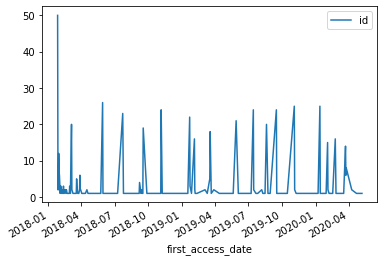

In [24]:
id_by_first_access_date.plot()

In [ ]:
# people that were in more than one cohort?

Could someone be stealing the content of our curriculum for their benefit beyond personal education? If so, we would probably see them accessing a large number of unique pages. I would imagine they wouldn't spend much time on each page, maybe taking screen shots, copy/paste or downloading the content. Let's take a look. 

Aggregate and compute 2 features...number of unique pages and total page views. 

In [ ]:
# let's make an examination:
# we want to look at individual users,
# and I want to know how they interact with pages in the curriculum,
# the number of unique pages and the number of total pages
page_views = df.groupby(['id'])['page'].agg(['count', 'nunique'])

In [ ]:
page_views

In [ ]:
# let's narrow down the scope
page_views[(page_views['count'] < 200) & (page_views['count'] > 190)]

Scale each attribute linearly. 

In [ ]:
# create the scaler
scaler = MinMaxScaler()
# use the scaler


In [ ]:
page_views_scaled_array[0:5]

Construct a DBSCAN object that requires a minimum of 20 data points in a neighborhood of radius 0.1 to be considered a core point.

In [ ]:
dbsc = DBSCAN(eps = .1, min_samples=20)

In [ ]:
# Merge the scaled and non-scaled values into one dataframe


In [ ]:
# let's apply the dbscan labels

In [ ]:
# grab our labels from our cluster model


In [ ]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(page_views.describe())
print("-------------")
print("Inliers")
print(page_views[page_views.labels==0].describe())
print("-------------")
print("Outliers")
print(page_views[page_views.labels==-1].describe())

## Experiment with the DBSCAN properties
- Read up on the epsilon and min_samples arguments into DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- Experiment with altering the epsilon values (the `eps` argument holding the threshhold parameter). Run the models and visualize the results. What has changed? Why do you think that is?
- Double the `min_samples` parameter. Run your model and visualize the results. Consider what changed and why.

# Exercise

**file name:** clustering_anomaly_detection.py or clustering_anomaly_detection.ipynb


### Clustering - DBSCAN

Ideas: 

Use DBSCAN to detect anomalies in curriculumn access. 

Use DBSCAN to detect anomalies in other products from the customers dataset. 

Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).
